In [1]:
#imports
%load_ext autoreload
%autoreload 2
import json
import numpy as np
import pandas as pd
import parse_data.prepare_data as prepare_data
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
import data_extraction.get_indices as get_indices
import plotting.plot_trajectory as plot_trajectory
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import globals
import scipy
import math
import parse_data.preprocess as preprocess
import flip_rotate_headangle_functions
import headangle_bin_assignment
import headangle_analysis_plotting_functions

In [2]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis'

json_filenames_all_social = [r'Json_data/2024-09-13_11-31-00_YansuJerrySocial.json',
                             r'Json_data/2024-09-27_14-25-20_SaraEmilySocial.json',
                             r'Json_data/2024-10-17_14-28-40_ShamirAbigailSocial.json',
                             r'Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json',
                             r'Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json']

In [3]:
df, trial_list = prepare_data.prepare_combined_session_data(data_folder, json_filenames_all_social)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data/2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data/2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data/2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
Preprocessing complete.
Preprocessing complete.
Preprocessing complete.
Preprocessing complete.


In [4]:
print(len(trial_list))

621


In [5]:
#filter for trials 

#High-Low
trial_list_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
trial_list_HL = [trial_list[i] for i in trial_list_indices]

#45° wall separation
single_wall_sep_trial_indices = get_indices.get_trials_with_wall_sep(trial_list_HL, wall_sep=1)
trial_list_45_HL = [trial_list_HL[i] for i in single_wall_sep_trial_indices]

#player 0 wins
player0_win_indices = get_indices.get_player_win_indices(trial_list_45_HL, player_id=0)
trial_list_0_45_HL = [trial_list_45_HL[i] for i in player0_win_indices]
print(len(trial_list_0_45_HL))

#player 1 wins
player1_win_indices = get_indices.get_player_win_indices(trial_list_45_HL, player_id=1)
trial_list_1_45_HL = [trial_list_45_HL[i] for i in player1_win_indices]
print(len(trial_list_1_45_HL))

85
117


In [6]:
#example trial

#find theta
theta = flip_rotate_trajectories.find_rotation_angle_trial(trial_list=trial_list_1_45_HL, trial_index=3)

In [ ]:
#find altered yaws
altered_yaw_values = flip_rotate_headangle_functions.flip_rotate_trial_headangles(trial_list=trial_list_1_45_HL, trial_index=3, player_id=1, theta=theta)

print(np.array(altered_yaw_values[1]))

In [11]:
#define trial
trial=trial_list_1_45_HL[3]

In [ ]:
#take the new yaw values for example player in example trial
player_altered_yaw = np.array(altered_yaw_values[1])
print(player_altered_yaw)

In [9]:
#create a copy of the trial with the new yaw values
trial_copy = flip_rotate_headangle_functions.replace_with_altered_yaws(trial_list=trial_list_1_45_HL, trial_index=3, altered_yaw_values=player_altered_yaw, player_id=1)

In [10]:
#define time stamps for trial copy
slice_onset = trial_copy[trial_copy['eventDescription'] == globals.SLICE_ONSET]
slice_onset_index = slice_onset.index[0] - trial_copy.index[0]
selected_trigger_activation = trial_copy[trial_copy['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
selected_trigger_activation_index = selected_trigger_activation.index[0] - trial_copy.index[0]

In [12]:
#checking head angles have changes

#head angles in original trial
original_headangles_dg = trial[globals.PLAYER_ROT_DICT[1]['yrot']].iloc[slice_onset_index:selected_trigger_activation_index]
print(original_headangles_dg)
#in radians
original_headangles = trajectory_vectors.extract_trial_player_headangles(trial=trial, player_id=1)
print(original_headangles)

24264     42.553680420
24265     42.553680420
24266     42.673961639
24267     43.108913422
24268     43.558643341
             ...      
24479    118.945289612
24480    118.985870361
24481    119.038803101
24482    119.081451416
24483    119.115821838
Name: data.playerPosition.1.rotation.y, Length: 220, dtype: float64
24264    0.742701832
24265    0.742701832
24266    0.744801135
24267    0.752392476
24268    0.760241744
            ...     
24479    2.075986933
24480    2.076695201
24481    2.077619052
24482    2.078363405
24483    2.078963282
Name: data.playerPosition.1.rotation.y, Length: 220, dtype: float64


In [15]:
#head angles in trial copy
headangles = trial_copy[globals.PLAYER_ROT_DICT[1]['yrot']].iloc[slice_onset_index:selected_trigger_activation_index]
print(headangles)
print(np.rad2deg(headangles))

24264    4.669692649
24265    4.669692649
24266    4.671791952
24267    4.679383293
24268    4.687232561
            ...     
24479    6.002977750
24480    6.003686018
24481    6.004609869
24482    6.005354222
24483    6.005954099
Name: data.playerPosition.1.rotation.y, Length: 220, dtype: float64
24264    267.553680420
24265    267.553680420
24266    267.673961639
24267    268.108913422
24268    268.558643341
             ...      
24479    343.945289612
24480    343.985870361
24481    344.038803101
24482    344.081451416
24483    344.115821838
Name: data.playerPosition.1.rotation.y, Length: 220, dtype: float64
24264    0.081501512
24265    0.081501512
24266    0.081538152
24267    0.081670645
24268    0.081807641
            ...     
24479    0.104771727
24480    0.104784088
24481    0.104800213
24482    0.104813204
24483    0.104823674
Name: data.playerPosition.1.rotation.y, Length: 220, dtype: float64


In [14]:
#takes the angles, which in this case are already radians, and extracts them in radians
#these results cannot be used for later functions
print(trajectory_vectors.extract_trial_player_headangles(trial=trial_copy, player_id=1))

24264    0.081501512
24265    0.081501512
24266    0.081538152
24267    0.081670645
24268    0.081807641
            ...     
24479    0.104771727
24480    0.104784088
24481    0.104800213
24482    0.104813204
24483    0.104823674
Name: data.playerPosition.1.rotation.y, Length: 220, dtype: float64


In [16]:
#flip and rotate trajectory for example trial

#obtain altered coordinates
altered_coords = flip_rotate_trajectories.flip_rotate_trial(trial_list=trial_list_1_45_HL, trial_index=3, theta=theta, flip=True)
altered_coords_array = np.array(altered_coords)

#replace old coordinates with new ones in new trial copy
trial_copy_coords = flip_rotate_trajectories.replace_with_altered_coordinates(trial_list=trial_list_1_45_HL, trial_index=3, altered_coordinates=altered_coords_array)

In [ ]:
#checking trajectory has changed

#trajectory in original trial copy
original_trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial_copy, player_id=1)
print(original_trajectory)

#trajectory in new trial 
updated_trajectory= trajectory_vectors.extract_trial_player_trajectory(trial=trial_copy_coords, player_id=1)
print(updated_trajectory)

In [ ]:
#combine new coordinates and new head angles in a single trial copy
trial_example = trial_copy
for i in range(len(altered_coords)):
        trial_example[globals.PLAYER_LOC_DICT[i]['xloc']] = altered_coords[i][0] # x coordinates
        trial_example[globals.PLAYER_LOC_DICT[i]['yloc']] = altered_coords[i][1] # y coordinates

#check that both coordinates and head angles are updated in trial example
example_trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial_example, player_id=1)
print(example_trajectory)

example_headangles = trajectory_vectors.extract_trial_player_headangles(trial=trial_example, player_id=1)
print(example_headangles) #these are radians of radians!!!
example_headangles_rad = np.rad2deg(trajectory_vectors.extract_trial_player_headangles(trial=trial_example, player_id=1))
print(example_headangles_rad) #these are regular radian angles


In [22]:
#sort new head angles into bin for example trial
#use corrected headangles in radians
bin_index = headangle_bin_assignment.sort_head_angle_into_bin(example_trajectory, example_headangles_rad, debug=False)
bin_index_array = np.array(bin_index)
print(bin_index_array)
print(f"Head angle at slice onset falls into Bin {int(bin_index_array[0])}")

[7]
Head angle at slice onset falls into Bin 7


In [24]:
#sort head angles into bin for original trial
bin_index_og = headangle_bin_assignment.sort_head_angle_into_bin(original_trajectory, original_headangles, debug=False)
bin_index_og_array = np.array(bin_index_og)
print(bin_index_og_array)
print(f"Head angle at slice onset falls into Bin {int(bin_index_og_array[0])}")

[2]
Head angle at slice onset falls into Bin 2


In [ ]:
#sort head angles into bins for all original trials
bin_assignments_original = headangle_bin_assignment.assign_bins_to_all_trials(trial_list=trial_list_1_45_HL, player_id=1, debug=False)

#print output
for idx, bin_index in enumerate(bin_assignments_original):
    print(f"Trial {idx}: Bin {bin_index}")

In [33]:
#create new trial list containing trials with updated yaws and coordinates
updated_trial_list1 = flip_rotate_headangle_functions.process_and_update_trials(trial_list_1_45_HL, 1)

In [34]:
#checks
print(len(updated_trial_list1))
print(np.rad2deg(trajectory_vectors.extract_trial_player_headangles(trial=updated_trial_list1[3], player_id=1)))

117
24264    267.553680420
24265    267.553680420
24266    267.673961639
24267    268.108913422
24268    268.558643341
             ...      
24479    343.945289612
24480    343.985870361
24481    344.038803101
24482    344.081451416
24483    344.115821838
Name: data.playerPosition.1.rotation.y, Length: 220, dtype: float64


In [35]:
#create new trial list containing trials with updated yaws and coordinates for other player
updated_trial_list0 = flip_rotate_headangle_functions.process_and_update_trials(trial_list_0_45_HL, 0)

In [36]:
#checks
print(len(updated_trial_list0))
print(np.rad2deg(trajectory_vectors.extract_trial_player_headangles(trial=updated_trial_list0[3], player_id=0)))

85
13595     39.000518799
13596     39.000518799
13597     38.201812744
13598     34.868316650
13599     29.173706055
             ...      
13706    333.118530273
13707    333.014373779
13708    332.806030273
13709    332.667114258
13710    332.562927246
Name: data.playerPosition.0.rotation.y, Length: 116, dtype: float64


In [ ]:
#sort head angle into bin for all updated trials
bin_assignments1 = headangle_bin_assignment.assign_bins_to_all_trials(trial_list=updated_trial_list1, player_id=1)
for idx, bin_index in enumerate(bin_assignments1):
    print(f"Trial {idx}: Bin {bin_index}")

In [ ]:
#sort head angle into bin for all updated trials
bin_assignments0 = headangle_bin_assignment.assign_bins_to_all_trials(trial_list=updated_trial_list0, player_id=0)
for idx, bin_index in enumerate(bin_assignments0):
    print(f"Trial {idx}: Bin {bin_index}")

In [40]:
#count number of trials for each bin
from collections import Counter

#count the occurrences of each bin
bin_counts = Counter(bin_assignments1)

#print the results
for bin_index, count in sorted(bin_counts.items()):
    print(f"Bin {bin_index}: {count} trials")

Bin 1: 29 trials
Bin 2: 14 trials
Bin 3: 10 trials
Bin 4: 8 trials
Bin 5: 15 trials
Bin 6: 11 trials
Bin 7: 16 trials
Bin 8: 14 trials


In [42]:
#determine which trials the winning player chose high
high_wall_chosen0 = get_indices.was_high_wall_chosen(updated_trial_list0)
high_wall_chosen1 = get_indices.was_high_wall_chosen(updated_trial_list1)
print(high_wall_chosen1)

[False  True  True  True  True False  True  True  True  True  True  True
  True False  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False False False  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [43]:
#count number of times winning player chose high for each head angle bin
from collections import defaultdict

#create a dictionary to store counts of True values per bin
bin_true_counts = defaultdict(int)

#iterate over both lists simultaneously
for bin_index, is_high_wall_chosen in zip(bin_assignments1, high_wall_chosen1):
    if is_high_wall_chosen: 
        bin_true_counts[bin_index] += 1

#print the results
for bin_index, count in sorted(bin_true_counts.items()):
    print(f"Bin {bin_index}: {count} True values")

Bin 1: 28 True values
Bin 2: 14 True values
Bin 3: 8 True values
Bin 4: 6 True values
Bin 5: 11 True values
Bin 6: 10 True values
Bin 7: 14 True values
Bin 8: 13 True values


In [45]:
#obtain ratios for how many times the winning player chose high given a head angle bin
#over the number of trials overall with that head angle bin

from collections import defaultdict

#create dictionaries to store counts of True values and total trials per bin
bin_true_counts = defaultdict(int) #number of times high wall was chosen given specific initial bin
bin_total_counts = defaultdict(int) #number of trials in specific bin overall

#bin assignments and high wall chosen for all trial lists
trial_data_lists = [(bin_assignments0, high_wall_chosen0), 
                    (bin_assignments1, high_wall_chosen1)]

#iterate through all provided trial lists
for bin_assignments, high_wall_chosen in trial_data_lists:

    #iterate over both lists simultaneously for the current trial list
    for bin_index, is_high_wall_chosen in zip(bin_assignments, high_wall_chosen):
        bin_total_counts[bin_index] += 1  #increment total trial count for the bin
        
        if is_high_wall_chosen:          #increment True count if high wall is chosen
            bin_true_counts[bin_index] += 1

#calculate the ratio for each bin
bin_probabilities = {bin_index: bin_true_counts[bin_index] / bin_total_counts[bin_index]
              for bin_index in sorted(bin_total_counts)}
 
#convert the dictionary to a list of values
bin_probabilities_list = list(bin_probabilities.values())

#order by bin index
probabilities_list = [bin_probabilities[bin_index] for bin_index in sorted(bin_total_counts)]

print(probabilities_list)

#print the results
for bin_index, probability in sorted(bin_probabilities.items()):
    print(f"Bin {bin_index}: {probability:.2f} (True/Total = {bin_true_counts[bin_index]}/{bin_total_counts[bin_index]})")



[0.9285714285714286, 0.9333333333333333, 0.52, 0.7692307692307693, 0.7272727272727273, 0.8461538461538461, 0.9285714285714286, 0.9310344827586207]
Bin 1: 0.93 (True/Total = 39/42)
Bin 2: 0.93 (True/Total = 28/30)
Bin 3: 0.52 (True/Total = 13/25)
Bin 4: 0.77 (True/Total = 10/13)
Bin 5: 0.73 (True/Total = 16/22)
Bin 6: 0.85 (True/Total = 11/13)
Bin 7: 0.93 (True/Total = 26/28)
Bin 8: 0.93 (True/Total = 27/29)


In [46]:
bin_ranges = headangle_bin_assignment.define_45_degree_bins()
print(bin_ranges)

[(np.float64(5.8904862254808625), np.float64(0.3926990816987242)), (np.float64(0.39269908169872414), np.float64(1.1780972450961724)), (np.float64(1.1780972450961726), np.float64(1.963495408493621)), (np.float64(1.9634954084936211), np.float64(2.7488935718910694)), (np.float64(2.748893571891069), np.float64(3.5342917352885173)), (np.float64(3.5342917352885173), np.float64(4.319689898685965)), (np.float64(4.319689898685965), np.float64(5.105088062083414)), (np.float64(5.105088062083414), np.float64(5.890486225480862))]


(2, 8)


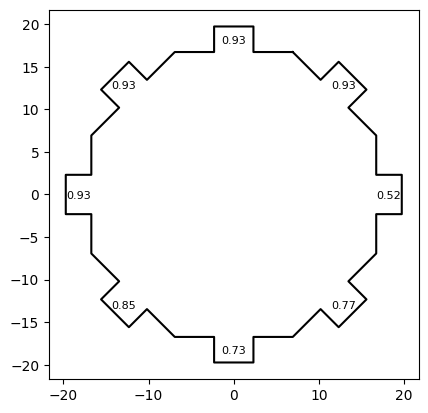

In [47]:
import matplotlib.pyplot as plt

# Plot the octagon (you can use your existing function for this)
ax = plot_octagon.plot_octagon()

# Define ratios list
probabilities_list = probabilities_list

# Plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, probabilities_list)

plt.show()

(2, 8)


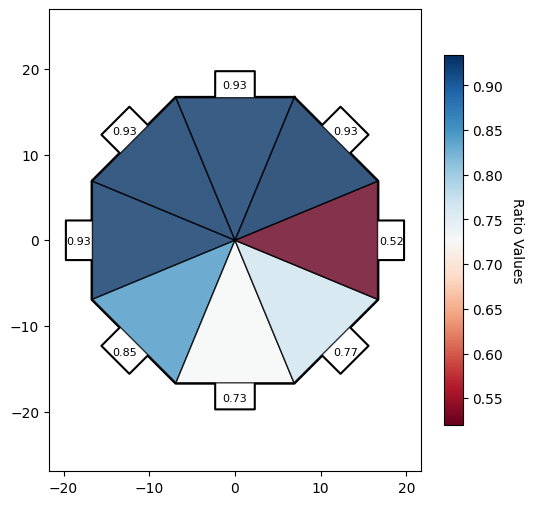

[0.9285714285714286, 0.9333333333333333, 0.52, 0.7692307692307693, 0.7272727272727273, 0.8461538461538461, 0.9285714285714286, 0.9310344827586207]


In [48]:
#plot color gradient octagon with ratios list (without subtracting average p(H))
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin ranges
bin_ranges = bin_ranges


#define ratios list
probabilities_list = probabilities_list
probabilities_list_reversed = probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, probabilities_list)

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cm.RdBu, norm=plt.Normalize(vmin=min(probabilities_list), vmax=max(probabilities_list)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("Ratio Values", rotation=270, labelpad=15)

plt.axis('equal')
plt.show()
print(probabilities_list)

In [49]:
#calculate average p(H) regardless of bin

from collections import defaultdict

#initialize counters for the total high wall choices and total trials overall
true_counts = 0
total_counts = 0

#bin assignments and high wall chosen for all trial lists
trial_data_lists = trial_data_lists #previously defined


#iterate through all provided trial lists
for bin_assignments, high_wall_chosen in trial_data_lists:

    #iterate over both lists simultaneously for the current trial list
    for is_high_wall_chosen in high_wall_chosen:
        total_counts += 1  #increment total trial count for the bin
        
        if is_high_wall_chosen:          #increment True count if high wall is chosen
            true_counts += 1

#calculate the average ratio 
print(true_counts)
print(total_counts)
overall_probability = true_counts / total_counts

print(overall_probability)


170
202
0.8415841584158416


In [50]:
#obtain difference between p(H) given bin and average p(H)

new_probabilities_list = [probability - overall_probability for probability in probabilities_list]
print(new_probabilities_list)

[0.08698727015558705, 0.0917491749174918, -0.32158415841584154, -0.07235338918507228, -0.11431143114311426, 0.004569687738004591, 0.08698727015558705, 0.08945032434277911]


(2, 8)


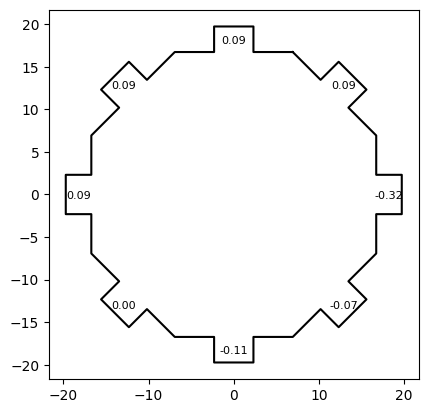

In [52]:
#plot octagon with new ratios list 
ax = plot_octagon.plot_octagon()

#define ratios list
new_probabilities_list = new_probabilities_list

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list)

plt.show()


(2, 8)


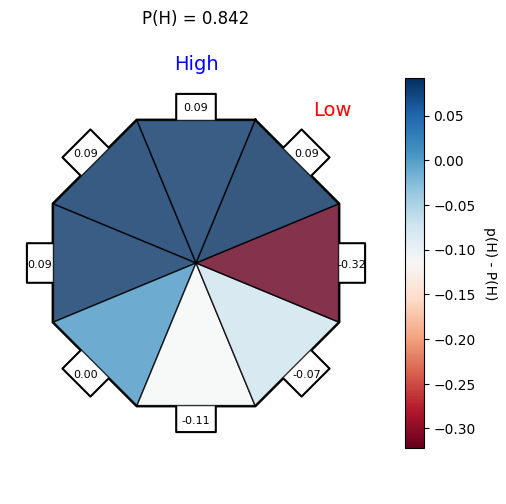

[0.08698727015558705, 0.0917491749174918, -0.32158415841584154, -0.07235338918507228, -0.11431143114311426, 0.004569687738004591, 0.08698727015558705, 0.08945032434277911]


In [77]:
#plot color gradient octagon for new ratios list

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#define ratios list
new_probabilities_list = new_probabilities_list
new_probabilities_list_reversed = new_probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Blue')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Red')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cm.RdBu, norm=plt.Normalize(vmin=min(new_probabilities_list), vmax=max(new_probabilities_list)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("p(H) - P(H)", rotation=270, labelpad=15)

plt.title("P(H) = 0.842")
plt.axis('equal')
plt.axis('off')
plt.show()
print(new_probabilities_list)